<h2>codebasics ML course: Logistic regression Practice:Multiclass

<img src="iris.png" width="200" height="200">

In [34]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

#LOAD DATA 

In [35]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame = True)
df = iris.frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [36]:
df['target_name'] = df['target'].map({0:'setosa',1:'versicolor',2:'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [37]:
df.shape

(150, 6)

In [38]:
df.target.unique()

array([0, 1, 2])

In [39]:
iris.target_names 

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [40]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

#### Data visualization and Exploration 

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

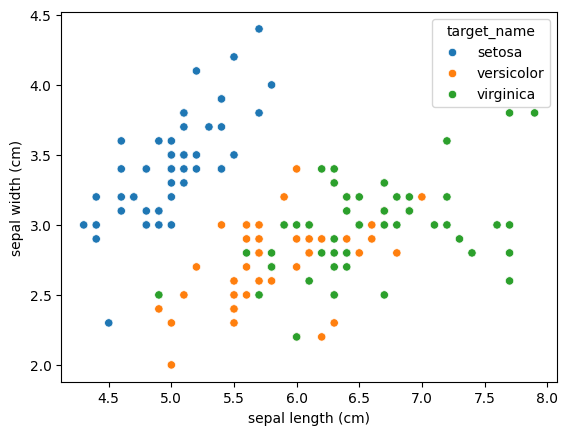

In [41]:
sns.scatterplot(
    data=df,
    x="sepal length (cm)",
    y="sepal width (cm)",
    hue="target_name"
)

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

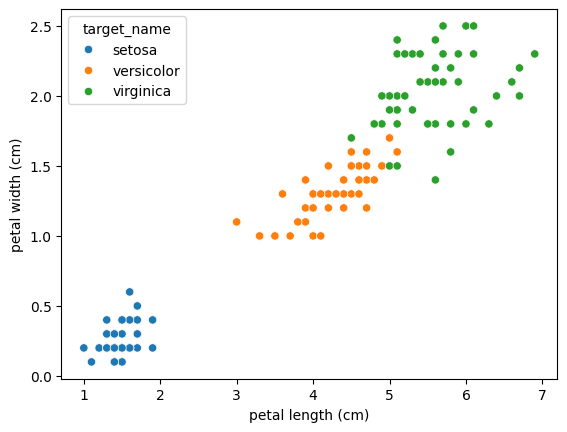

In [42]:
sns.scatterplot(
    data=df,
    x="petal length (cm)",
    y="petal width (cm)",
    hue="target_name"
)

In [43]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'target_name'],
      dtype='object')

In [44]:
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']]
y = df['target']
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


###Model training 

In [45]:
from sklearn.linear_model import LogisticRegression

# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

# Train logistic regression model 
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


###Model evaluation 

In [46]:
model.score(X_test,y_test)

0.9777777777777777

In [47]:
y_pred = model.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test,y_pred)

0.9777777777777777

In [49]:
y_pred[:10]

array([1, 2, 2, 0, 2, 1, 0, 2, 0, 1])

In [50]:
y_pred[:10].tolist()

[1, 2, 2, 0, 2, 1, 0, 2, 0, 1]

### Model Evaluation :Precision,Recall,F1 Score


In [52]:
from sklearn.metrics import classification_report

report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        16
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## Model Evaluation:Confusion Matrix 

In [53]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[15,  0,  0],
       [ 0, 15,  1],
       [ 0,  0, 14]])

In [54]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

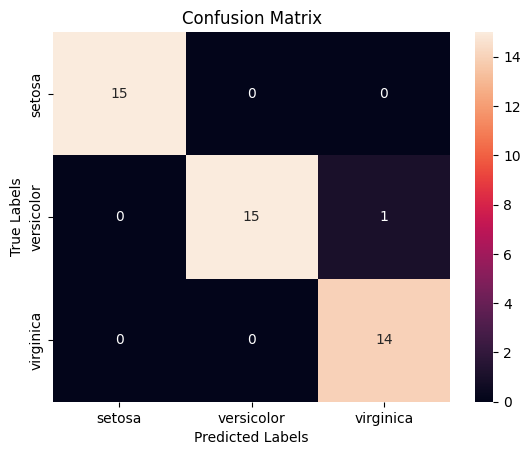

In [55]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, xticklabels=iris.target_names, yticklabels=iris.target_names)   
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()